In [1]:
!pip install geopandas
!pip install pyshp


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

## Charging stations on highways
The data speaks about ev stations on highways around India

In [3]:
evs_highway=pd.read_csv("Geo Datasets/CS_Highway.csv")
evs_highway.head(10)

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Chennai- Nagpur,114
9,Total,Total,708


In [4]:
#Total row doesnt provide insights including it mis leads the info so droping it
evs_highway = evs_highway.iloc[:-1,:] # discarding the last row

In [5]:
ev_sanctioned = pd.read_csv("Geo Datasets/CS_Sanctioned.csv")
ev_sanctioned

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [6]:
#Total row doesnt provide insights including it mis leads the info so droping it
ev_sanctioned = ev_sanctioned.iloc[:-1,:] # discarding the last row

In [7]:
def extraction(df):
    dataset=pd.read_excel(df,skiprows=[0,1])
    dataset.rename(columns=dataset.iloc[0], inplace = True)
    dataset=dataset.iloc[1:,1:]
    dataset.rename(columns={np.nan:'Vehicle Class'},inplace=True)
    dataset=dataset[["Vehicle Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]]
    return dataset

In [8]:
extraction("Geo Datasets/type_maharashtra.xlsx")

,Vehicle Class,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
1,ADAPTED VEHICLE,"8,032",0,421,5,"7,225"
2,AGRICULTURAL TRACTOR,"6,66,624",0,"6,61,896",8,470
3,AMBULANCE,"14,810",35,"10,347",1,"4,271"
4,ANIMAL AMBULANCE,21,1,17,0,1
5,ARTICULATED VEHICLE,"31,453",0,"31,174",0,0
...,...,...,...,...,...,...
67,VEHICLE FITTED WITH COMPRESSOR,371,0,370,0,1
68,VEHICLE FITTED WITH GENERATOR,"2,390",4,"2,380",1,3
69,VEHICLE FITTED WITH RIG,"1,159",0,"1,143",4,4
70,VINTAGE MOTOR VEHICLE,165,0,19,0,143


A raw dataset!!!!!!!!!!!!!

In [9]:
list(extraction("Geo Datasets/type_maharashtra.xlsx")["Vehicle Class"].iloc[:,0])

['ADAPTED VEHICLE',
 'AGRICULTURAL TRACTOR',
 'AMBULANCE',
 'ANIMAL AMBULANCE',
 'ARTICULATED VEHICLE',
 'AUXILIARY TRAILER',
 'BREAKDOWN VAN',
 'BULLDOZER',
 'BUS',
 'CAMPER VAN / TRAILER',
 'CAMPER VAN / TRAILER (PRIVATE USE)',
 'CASH VAN',
 'CONSTRUCTION EQUIPMENT VEHICLE',
 'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)',
 'CRANE MOUNTED VEHICLE',
 'DUMPER',
 'EARTH MOVING EQUIPMENT',
 'EDUCATIONAL INSTITUTION BUS',
 'E-RICKSHAW(P)',
 'E-RICKSHAW WITH CART (G)',
 'EXCAVATOR (COMMERCIAL)',
 'EXCAVATOR (NT)',
 'FIRE FIGHTING VEHICLE',
 'FIRE TENDERS',
 'FORK LIFT',
 'GOODS CARRIER',
 'HARVESTER',
 'HEARSES',
 'LIBRARY VAN',
 'LUXURY CAB',
 'MAXI CAB',
 'M-CYCLE/SCOOTER',
 'M-CYCLE/SCOOTER-WITH SIDE CAR',
 'MOBILE CANTEEN',
 'MOBILE CLINIC',
 'MOBILE WORKSHOP',
 'MODULAR HYDRAULIC TRAILER',
 'MOPED',
 'MOTOR CAB',
 'MOTOR CAR',
 'MOTOR CYCLE/SCOOTER-SIDECAR(T)',
 'MOTOR CYCLE/SCOOTER-USED FOR HIRE',
 'MOTOR CYCLE/SCOOTER-WITH TRAILER',
 'MOTORISED CYCLE (CC > 25CC)',
 'OMNI BUS',
 'OMNI

**The data contains all type of vehicles, but here we are focussing on only the following types:**

- BUS
- E-RICKSHAW(P)
- M-CYCLE/SCOOTER
- M-CYCLE/SCOOTER-WITH SIDE CAR
- MOPED
- MOTOR CAB
- MOTOR CAR
- OMNI BUS
- THREE WHEELER (GOODS)
- THREE WHEELER (PASSENGER)
- THREE WHEELER (PERSONAL)
- E-RICKSHAW WITH CART (G)

In [10]:
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

In [11]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()           

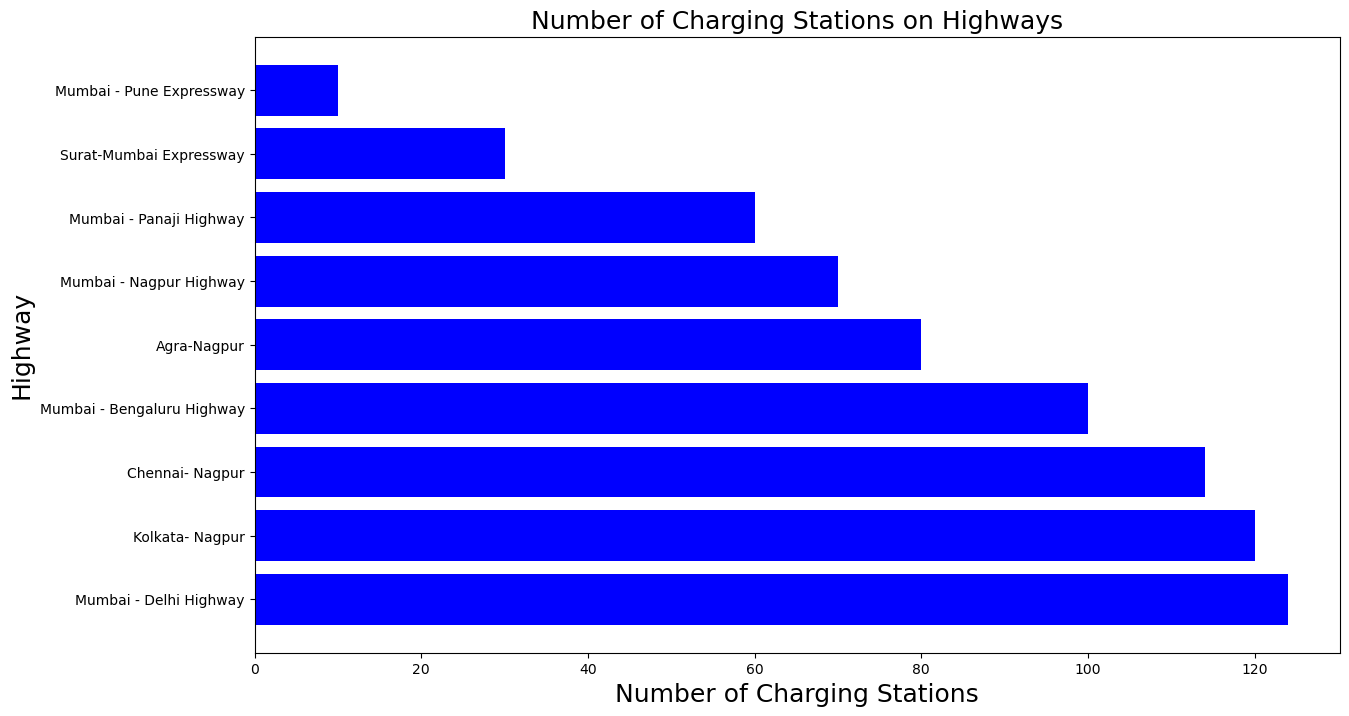

In [12]:
plot_frequency(evs_highway,"Highways/Expressways","Charging Stations", "Number of Charging Stations",
               "Highway","Number of Charging Stations on Highways",'blue')

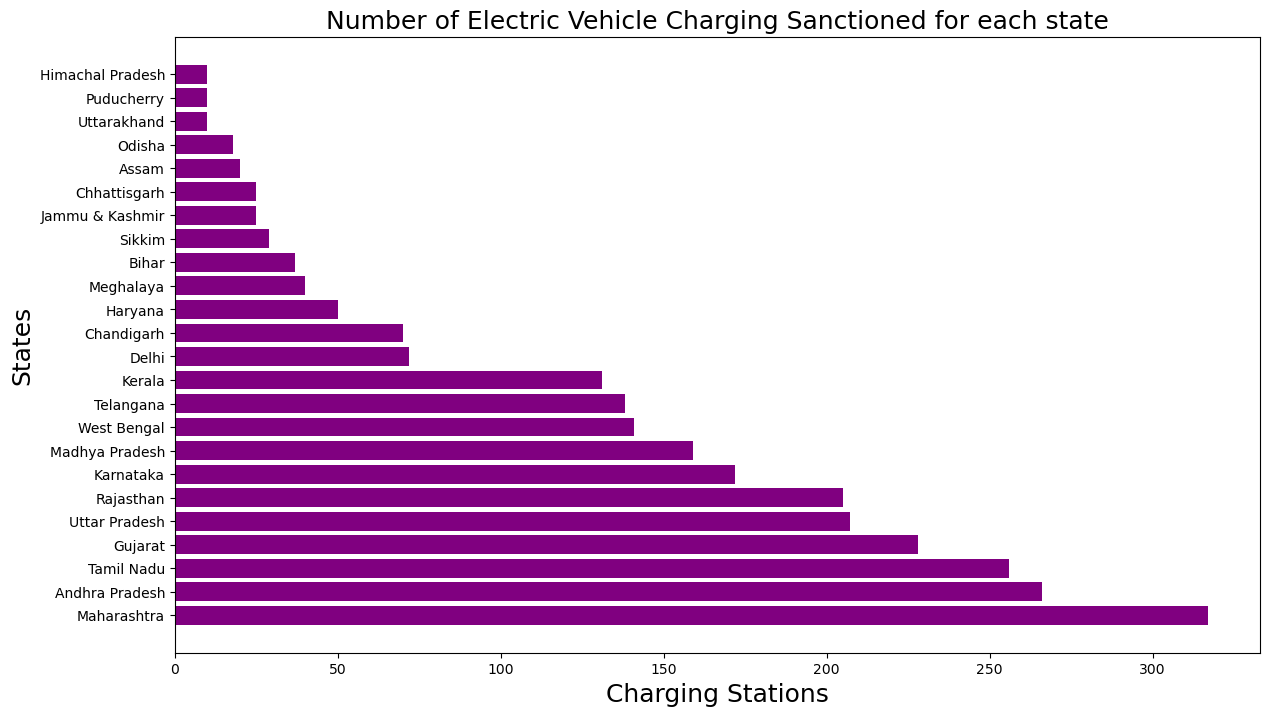

In [13]:
plot_frequency(ev_sanctioned,'State/UT-wise','Number of Electric Vehicle Charging Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','purple')

**States to target based on charging stations sanctioned**

- Maharashtra
- Andhra Pradesh
- Tamil Nadu
- Gujarat
- Uttar Pradesh
- Rajasthan
- Karnataka

# Integrating data for EV of all states:

In [14]:
def get_all_data(state,state_name):
    data = extraction(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'][0] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [str(z).replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["Vehicle Class","ELECTRIC(BOV)","State"]]

In [15]:
datas = ["type_AP.xlsx","type_assam.xlsx","type_bihar.xlsx","type_chandigarh.xlsx","type_chhatisgarh.xlsx",
              "type_Delhi.xlsx","type_guj.xlsx","type_haryana.xlsx","type_HP.xlsx","type_jammu.xlsx","type_karnataka.xlsx",
              "type_kerala.xlsx","type_maharashtra.xlsx","type_meghalaya.xlsx","type_MP.xlsx","type_odisha.xlsx",
              "type_puducherry.xlsx","type_rajasthan.xlsx","type_sikkim.xlsx","type_TN.xlsx","type_UP.xlsx",
              "type_uttarakhand.xlsx","type_WB.xlsx"]
data_files=[]
for i in datas:
    data='Geo Datasets'+'/'+i
    data_files.append(data)

In [16]:
data_files

['Geo Datasets/type_AP.xlsx',
 'Geo Datasets/type_assam.xlsx',
 'Geo Datasets/type_bihar.xlsx',
 'Geo Datasets/type_chandigarh.xlsx',
 'Geo Datasets/type_chhatisgarh.xlsx',
 'Geo Datasets/type_Delhi.xlsx',
 'Geo Datasets/type_guj.xlsx',
 'Geo Datasets/type_haryana.xlsx',
 'Geo Datasets/type_HP.xlsx',
 'Geo Datasets/type_jammu.xlsx',
 'Geo Datasets/type_karnataka.xlsx',
 'Geo Datasets/type_kerala.xlsx',
 'Geo Datasets/type_maharashtra.xlsx',
 'Geo Datasets/type_meghalaya.xlsx',
 'Geo Datasets/type_MP.xlsx',
 'Geo Datasets/type_odisha.xlsx',
 'Geo Datasets/type_puducherry.xlsx',
 'Geo Datasets/type_rajasthan.xlsx',
 'Geo Datasets/type_sikkim.xlsx',
 'Geo Datasets/type_TN.xlsx',
 'Geo Datasets/type_UP.xlsx',
 'Geo Datasets/type_uttarakhand.xlsx',
 'Geo Datasets/type_WB.xlsx']

In [17]:
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu & Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

In [18]:
concat_states = []
for i,j in zip(data_files,states):
    concat_states.append(get_all_data(i,j))

In [19]:
f_df=pd.concat(concat_states,axis = 0) 
f_df

,Vehicle Class,Vehicle Class,ELECTRIC(BOV),State
0,BUS,"11,314",0.0,Andhra Pradesh
1,E-RICKSHAW(P),397,397.0,Andhra Pradesh
2,E-RICKSHAW WITH CART (G),260,260.0,Andhra Pradesh
3,M-CYCLE/SCOOTER,"35,87,656",10718.0,Andhra Pradesh
4,M-CYCLE/SCOOTER-WITH SIDE CAR,"1,250",601.0,Andhra Pradesh
...,...,...,...,...
7,MOTOR CAR,"16,88,132",1117.0,West Bengal
8,OMNI BUS,"21,746",0.0,West Bengal
9,THREE WHEELER (GOODS),"64,034",377.0,West Bengal
10,THREE WHEELER (PASSENGER),"1,55,084",392.0,West Bengal


In [20]:
f_df.to_excel('All states classes.xlsx')

In [21]:
mean_evs=f_df.groupby(by = "State")['ELECTRIC(BOV)'].mean()
mean_evs

State
Andhra Pradesh       1058.833333
Assam                5865.083333
Bihar                7627.416667
Chandigarh            281.272727
Chhatisgarh          1860.250000
Delhi               13762.500000
Gujarat              4505.750000
Haryana              3332.833333
Himachal Pradesh      103.500000
Jammu & Kashmir       324.833333
Karnataka           10263.333333
Kerala               3000.833333
Madhya Pradesh        130.000000
Maharashtra         11196.750000
Meghalaya               5.000000
Odisha               2218.333333
Puducherry            189.333333
Rajasthan            7596.916667
Sikkim                  2.571429
Tamil Nadu           6748.083333
Uttar Pradesh       30160.250000
Uttarakhand          2782.333333
West Bengal          4158.666667
Name: ELECTRIC(BOV), dtype: float64

<Axes: title={'center': 'Mean of Electric Vehicles'}, ylabel='State'>

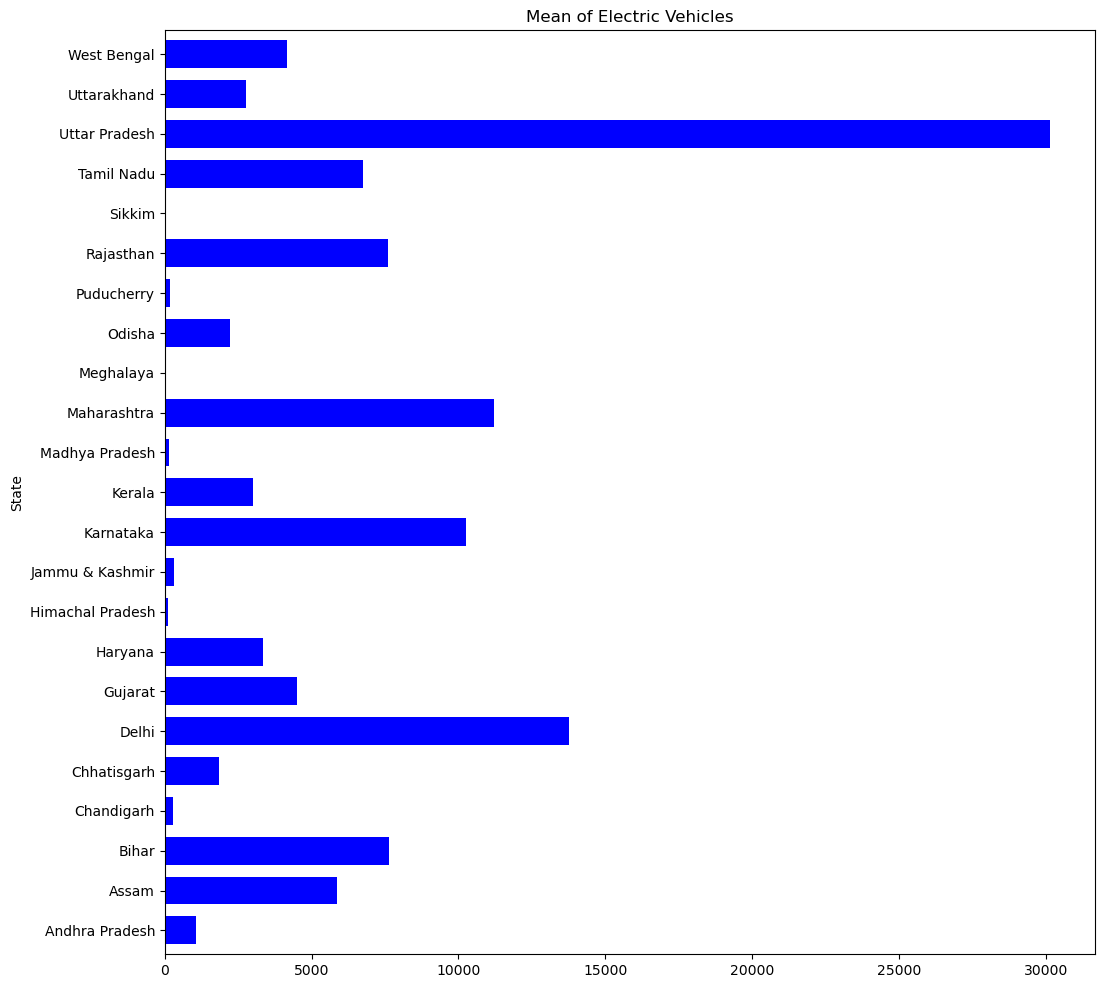

In [22]:
mean_evs.plot.barh(figsize = (12,12), width = 0.7,title = 'Mean of Electric Vehicles', color = 'blue')

**States to target :**
- Maharashtra
- Uttar Pradesh
- Karnataka
- Gujarat
- Delhi
- Rajasthan
- Haryana

In [23]:
def get_imp_vehicle(state):
    data = extraction(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'][0] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    
    new_frame["CNG ONLY"] = [z.replace(',','') for z in new_frame["CNG ONLY"].values]
    new_frame["DIESEL"] = [z.replace(',','') for z in new_frame["DIESEL"].values]
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["PETROL"] = [z.replace(',','') for z in new_frame["PETROL"].values]
    
    new_frame["CNG ONLY"] = new_frame["CNG ONLY"].astype(float)
    new_frame["DIESEL"] =  new_frame["DIESEL"].astype(float)
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame["PETROL"] = new_frame["PETROL"].astype(float)
        
    return new_frame

# Visualizing the fuel types used for each vehicle class & identifying vehicle categories utilizing Battery Electric Vehicle (BEV) technology.

## Maharashtra

In [24]:
mh = get_imp_vehicle("Geo Datasets/type_maharashtra.xlsx")
mh=mh.iloc[:,[0,2,3,4,5]]
mh

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,7515.0,109628.0,1116.0,1916.0
1,E-RICKSHAW(P),0.0,30.0,6020.0,108.0
2,E-RICKSHAW WITH CART (G),0.0,0.0,2132.0,0.0
3,M-CYCLE/SCOOTER,0.0,5537.0,106327.0,22876524.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,7.0,9.0,6040.0
5,MOPED,0.0,26.0,4092.0,239116.0
6,MOTOR CAB,1542.0,149928.0,798.0,10683.0
7,MOTOR CAR,1094.0,1971766.0,12609.0,2682375.0
8,OMNI BUS,3.0,375.0,0.0,182.0
9,THREE WHEELER (GOODS),6987.0,74826.0,912.0,563.0


<Axes: ylabel='Vehicle Class'>

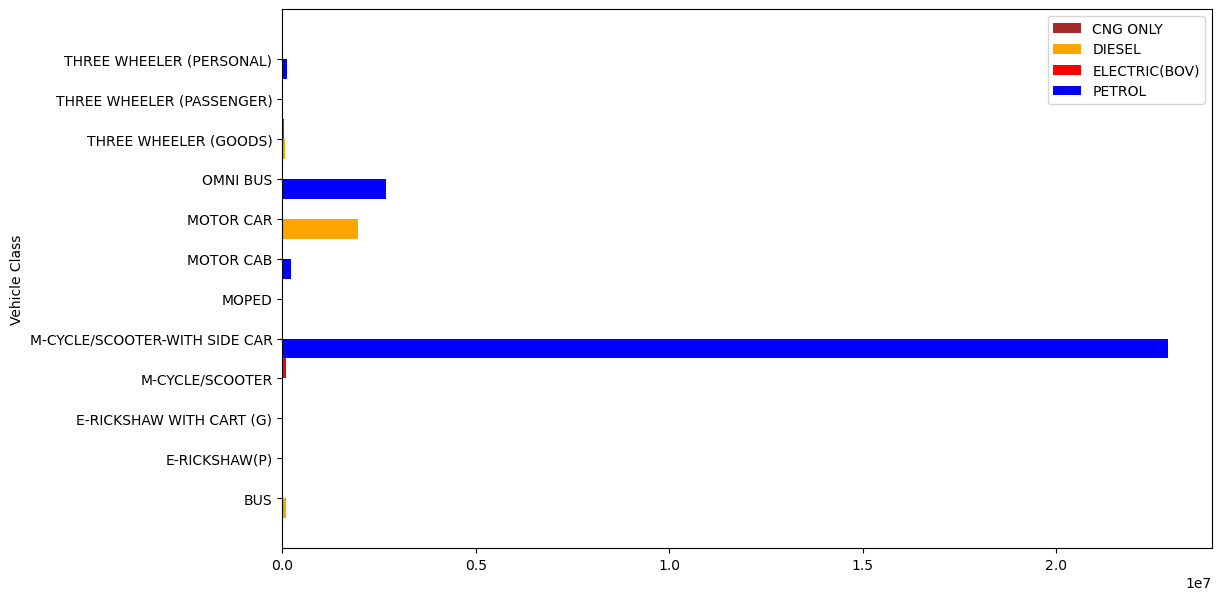

In [28]:
mh.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 2.0)

- **The visualization displays the utilization of different fuel types across various vehicle classes.**

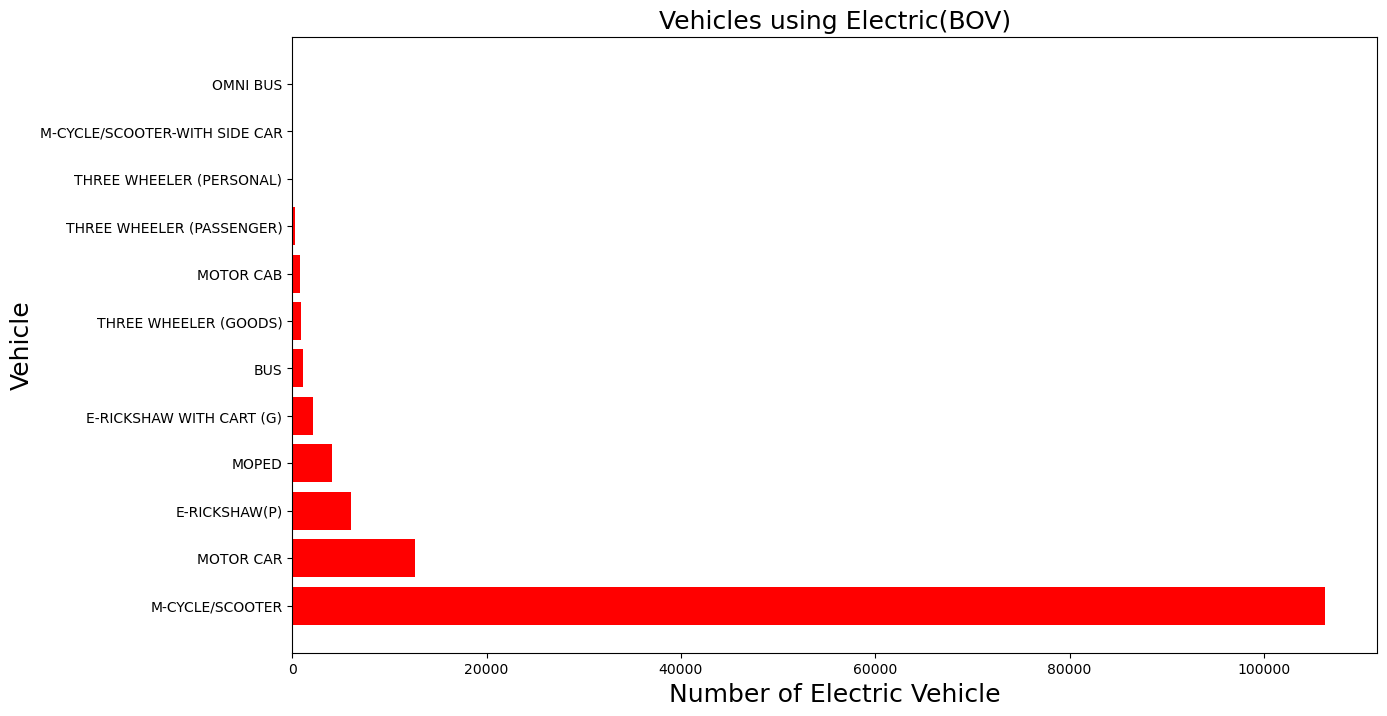

In [30]:
plot_frequency(mh,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **The visualization highlights specific vehicle categories within the Maharashtra state that present opportunities for targeting Battery Electric Vehicles (BEVs).**

## Uttar Pradesh:

In [33]:
up = get_imp_vehicle("Geo Datasets/type_UP.xlsx")
up=up.iloc[:,[0,2,3,4,5]]
up

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,13484.0,93406.0,576.0,83.0
1,E-RICKSHAW(P),11.0,45.0,320515.0,5.0
2,E-RICKSHAW WITH CART (G),2.0,51.0,9273.0,1.0
3,M-CYCLE/SCOOTER,65.0,11593.0,28717.0,31845948.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,9.0,14.0,4859.0
5,MOPED,1.0,213.0,555.0,1125365.0
6,MOTOR CAB,831.0,101591.0,25.0,5400.0
7,MOTOR CAR,2169.0,1500358.0,483.0,1993210.0
8,OMNI BUS,818.0,5098.0,0.0,210.0
9,THREE WHEELER (GOODS),10613.0,86192.0,354.0,5293.0


<Axes: ylabel='Vehicle Class'>

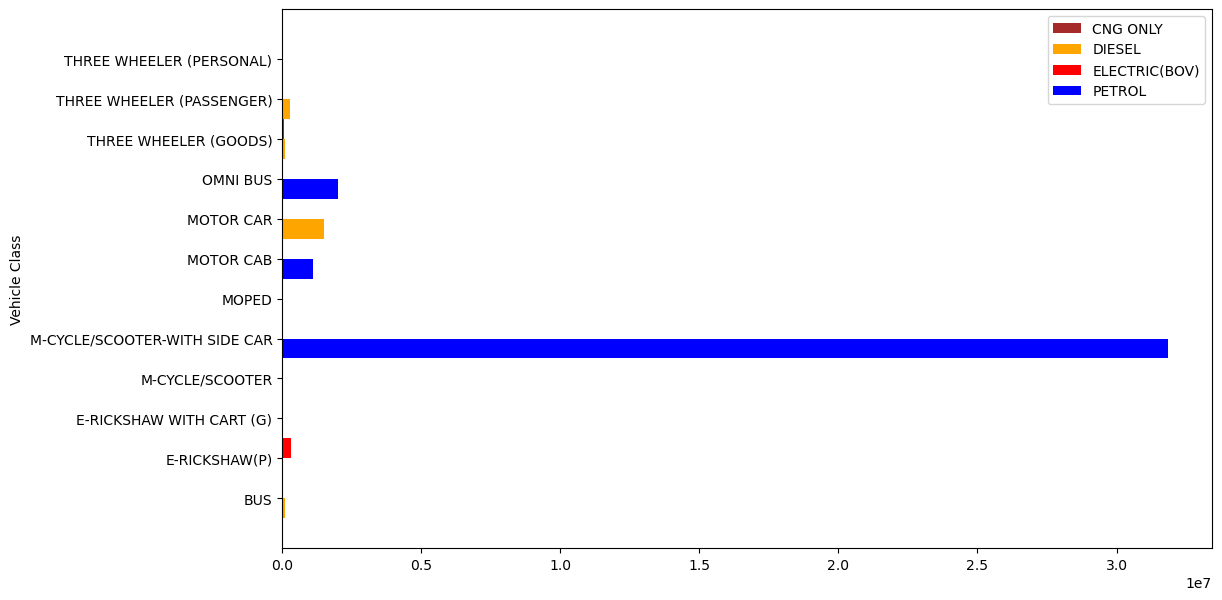

In [35]:
up.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 2.0)

- **This plot explains utilisation of different fuels in the state UP**

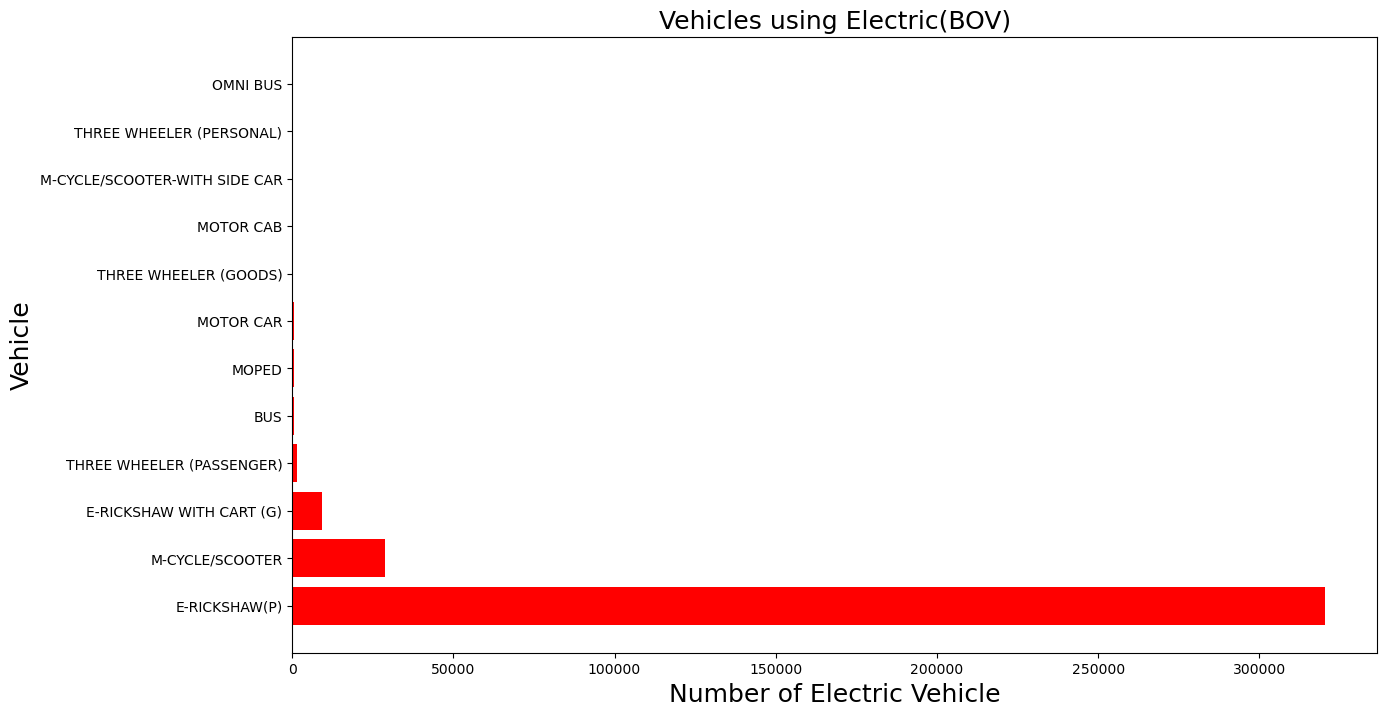

In [36]:
plot_frequency(up,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **This plot illustrates the potential opportunities within the Electric Vehicle (EV) market in Uttar Pradesh (UP).** 

## Delhi

In [37]:
dl=get_imp_vehicle('Geo Datasets/type_Delhi.xlsx')
dl=dl.iloc[:,[0,2,3,4,5]]
dl

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,33371.0,29099.0,329.0,10.0
1,E-RICKSHAW(P),0.0,0.0,108765.0,0.0
2,E-RICKSHAW WITH CART (G),0.0,0.0,10698.0,0.0
3,M-CYCLE/SCOOTER,2.0,205.0,33767.0,8538623.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,0.0,23.0,1275.0
5,MOPED,0.0,13.0,259.0,128828.0
6,MOTOR CAB,16411.0,50433.0,2938.0,9498.0
7,MOTOR CAR,5357.0,699355.0,4663.0,2570696.0
8,OMNI BUS,22.0,151.0,1.0,399.0
9,THREE WHEELER (GOODS),59109.0,1.0,3227.0,0.0


<Axes: ylabel='Vehicle Class'>

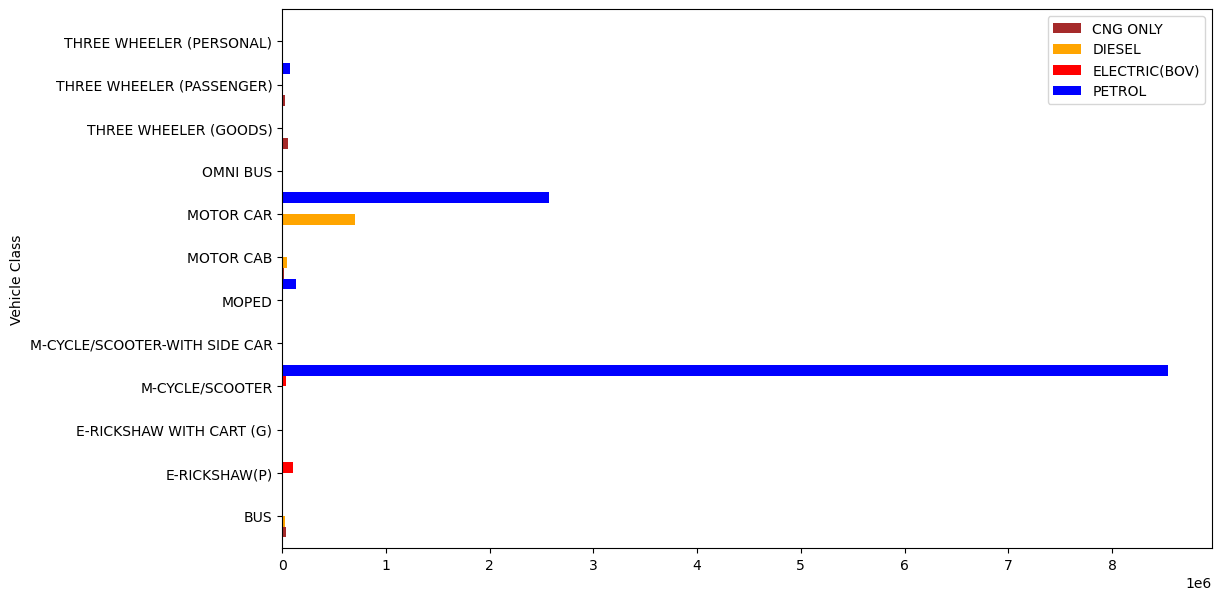

In [39]:
dl.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 1.0)

- **This plot explains utilisation of different fuels in the state Delhi**

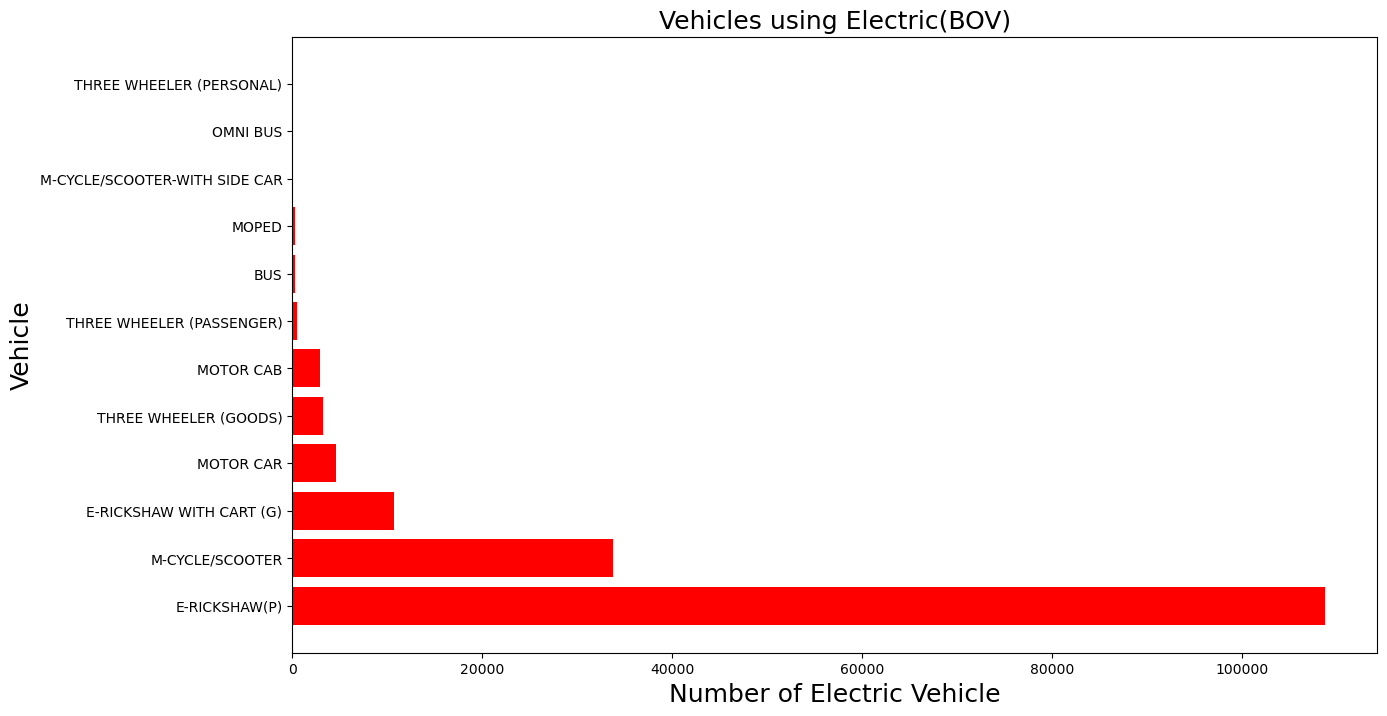

In [41]:
plot_frequency(dl,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **This plot illustrates the potential opportunities within the Electric Vehicle (EV) market in Delhi.** 

## Karnataka

In [42]:
ka=get_imp_vehicle('Geo Datasets/type_karnataka.xlsx')
ka=ka.iloc[:,[0,2,3,4,5]]
ka

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,50.0,122361.0,199.0,634.0
1,E-RICKSHAW(P),0.0,8.0,482.0,13.0
2,E-RICKSHAW WITH CART (G),0.0,8.0,802.0,0.0
3,M-CYCLE/SCOOTER,4.0,26858.0,89417.0,19344321.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,159.0,114.0,141277.0
5,MOPED,1.0,644.0,4072.0,741716.0
6,MOTOR CAB,90.0,284456.0,1750.0,27734.0
7,MOTOR CAR,90.0,1330542.0,8871.0,2508818.0
8,OMNI BUS,1.0,48175.0,6.0,8888.0
9,THREE WHEELER (GOODS),912.0,187114.0,2500.0,15829.0


<Axes: ylabel='Vehicle Class'>

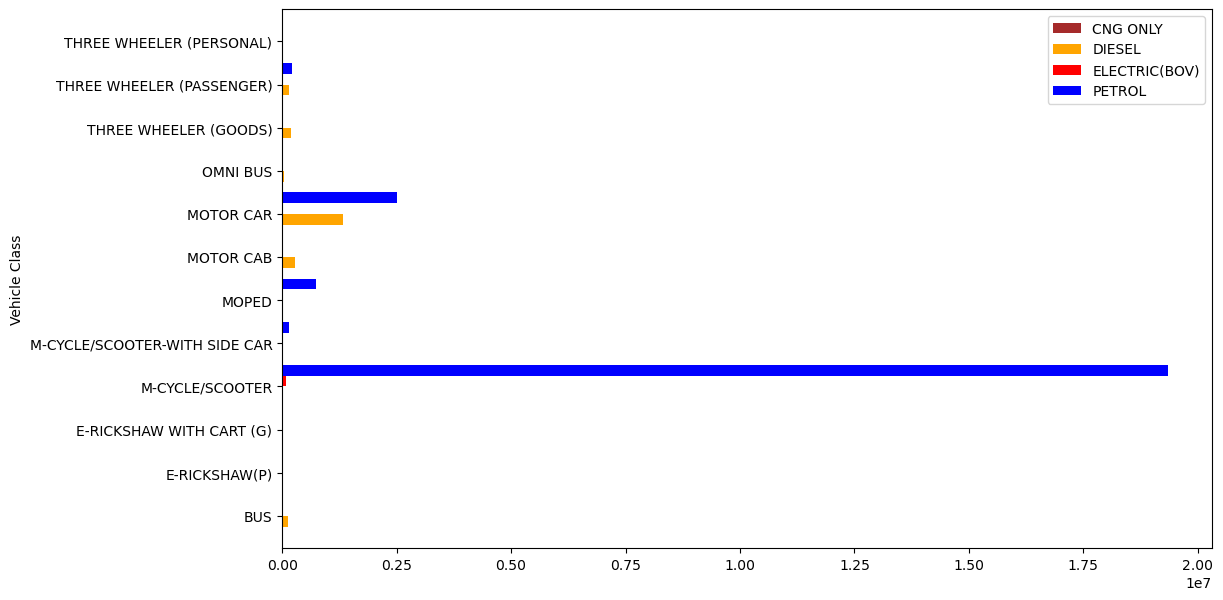

In [43]:
ka.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 1.0)

- **This plot explains utilisation of different fuels in the state Karnataka**

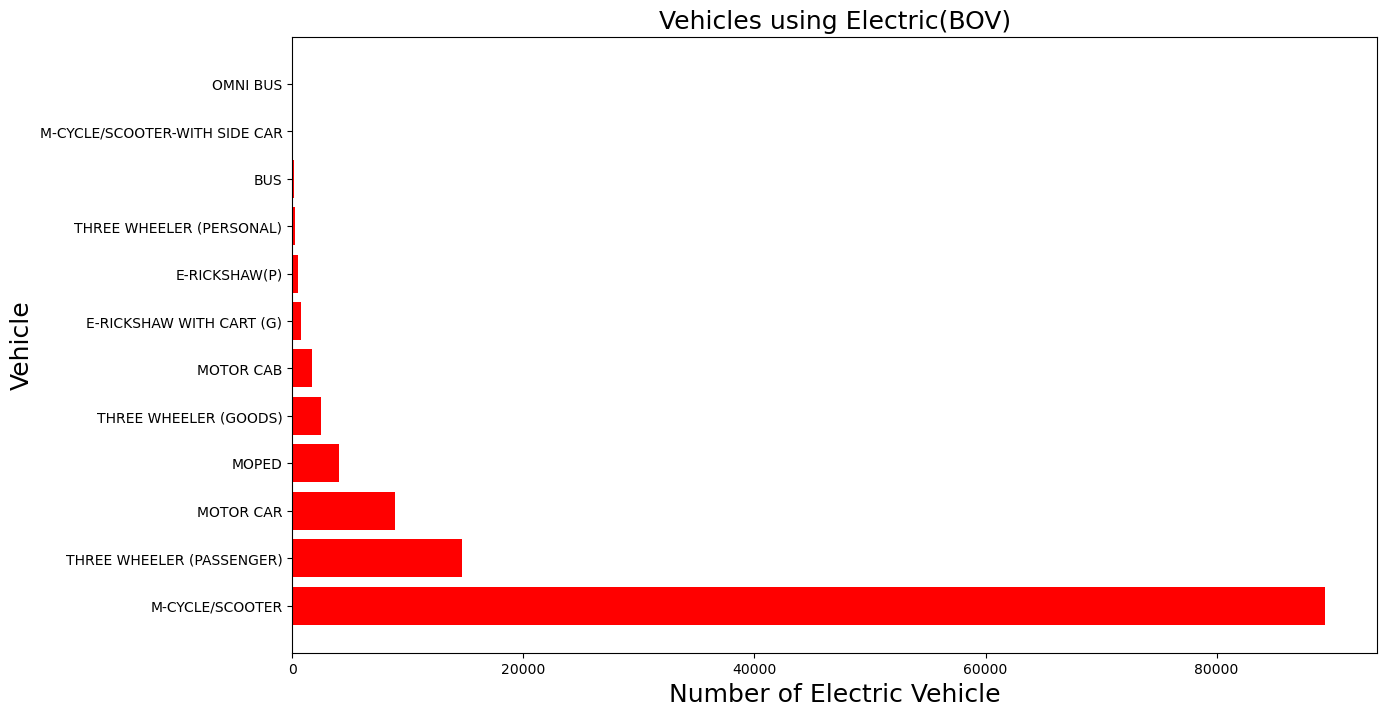

In [44]:
plot_frequency(ka,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **This plot illustrates the potential opportunities within the Electric Vehicle (EV) market in Karnataka.** 

## Gujarat

In [46]:
gj = get_imp_vehicle("Geo Datasets/type_guj.xlsx")
gj=gj.iloc[:,[0,2,3,4,5]]
gj

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,1738.0,49432.0,360.0,71.0
1,E-RICKSHAW(P),2.0,63.0,443.0,80.0
2,E-RICKSHAW WITH CART (G),0.0,52.0,421.0,1.0
3,M-CYCLE/SCOOTER,2.0,10016.0,39633.0,14082905.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,13.0,21.0,2798.0
5,MOPED,0.0,40.0,8376.0,699756.0
6,MOTOR CAB,79.0,26934.0,86.0,5748.0
7,MOTOR CAR,1926.0,1256068.0,2882.0,1435646.0
8,OMNI BUS,69.0,3209.0,2.0,18.0
9,THREE WHEELER (GOODS),6745.0,235647.0,1237.0,1205.0


<Axes: ylabel='Vehicle Class'>

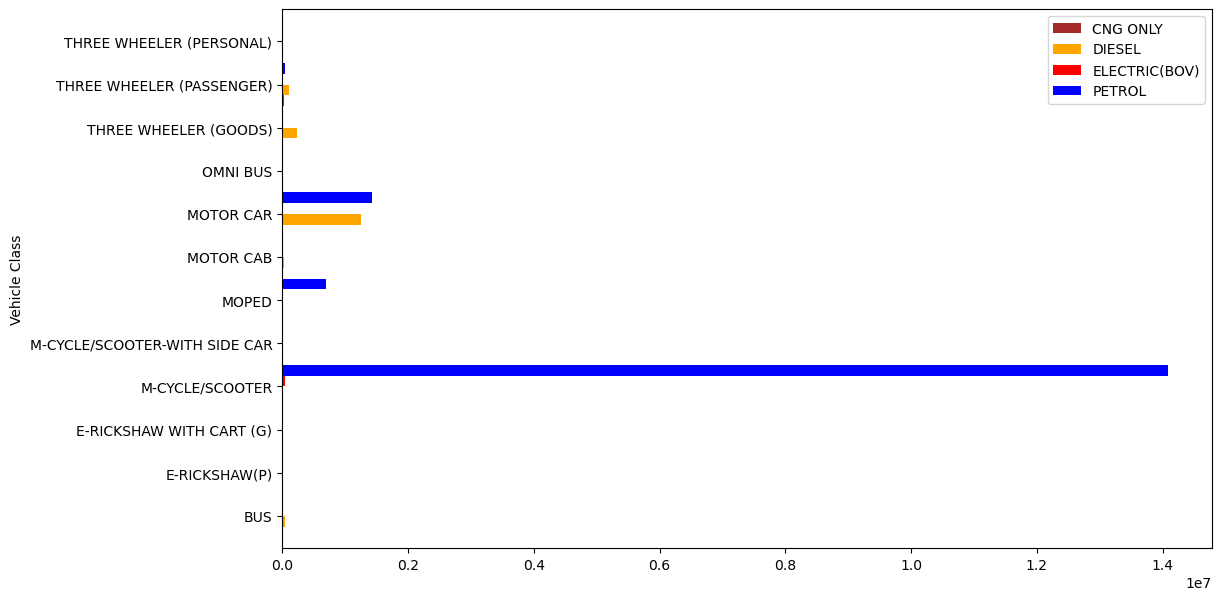

In [47]:
gj.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 1.0)

- **This plot explains utilisation of different fuels in the state Gujarat**

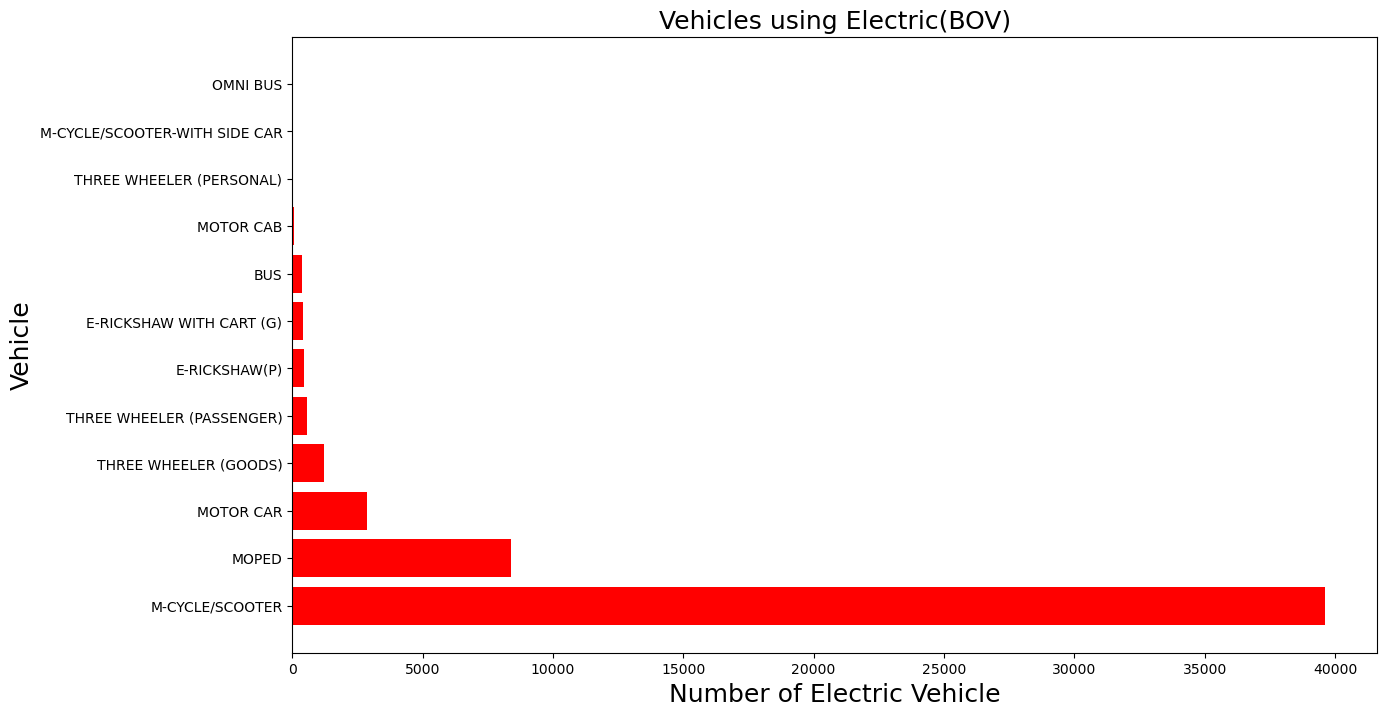

In [48]:
plot_frequency(gj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **This plot illustrates the potential opportunities within the Electric Vehicle (EV) market in Gujarat.** 

## Rajasthan

In [50]:
rj = get_imp_vehicle("Geo Datasets/type_rajasthan.xlsx")
rj=rj.iloc[:,[0,2,3,4,5]]
rj

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,196.0,65803.0,1.0,59.0
1,E-RICKSHAW(P),0.0,98.0,35836.0,3.0
2,E-RICKSHAW WITH CART (G),0.0,20.0,5534.0,0.0
3,M-CYCLE/SCOOTER,1.0,2428.0,44777.0,12382954.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,6.0,6.0,32261.0
5,MOPED,0.0,38.0,2923.0,206887.0
6,MOTOR CAB,12.0,94095.0,39.0,6967.0
7,MOTOR CAR,40.0,889434.0,1595.0,1062900.0
8,OMNI BUS,20.0,17689.0,0.0,149.0
9,THREE WHEELER (GOODS),1057.0,45623.0,336.0,297.0


<Axes: ylabel='Vehicle Class'>

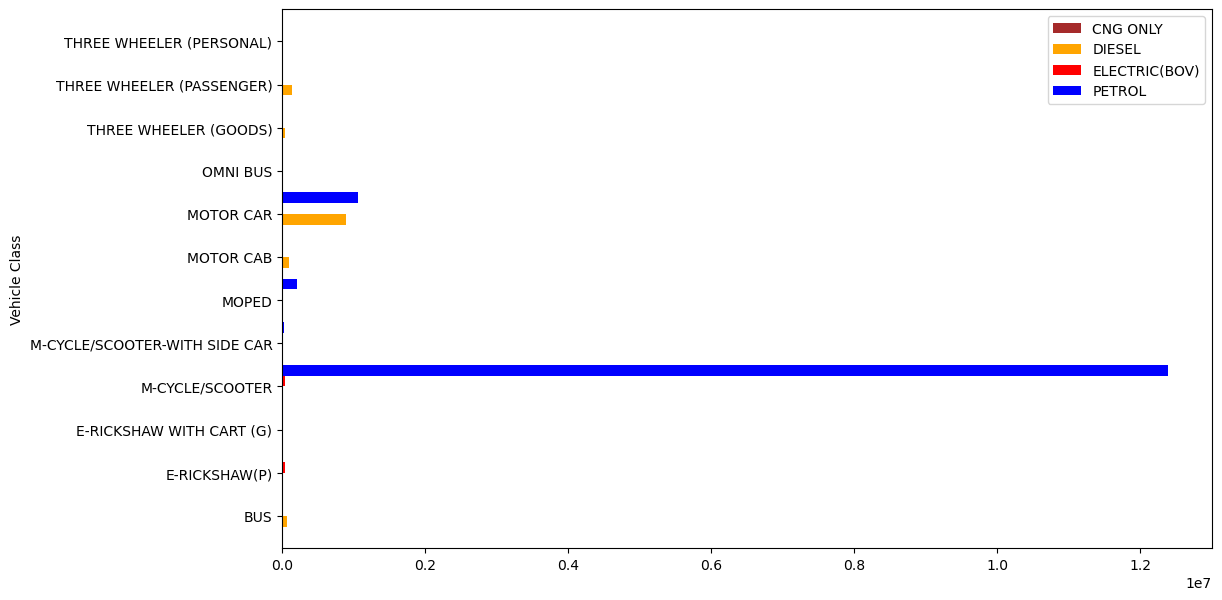

In [51]:
rj.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 1.0)

- **This plot explains utilisation of different fuels in the state Rajasthan**

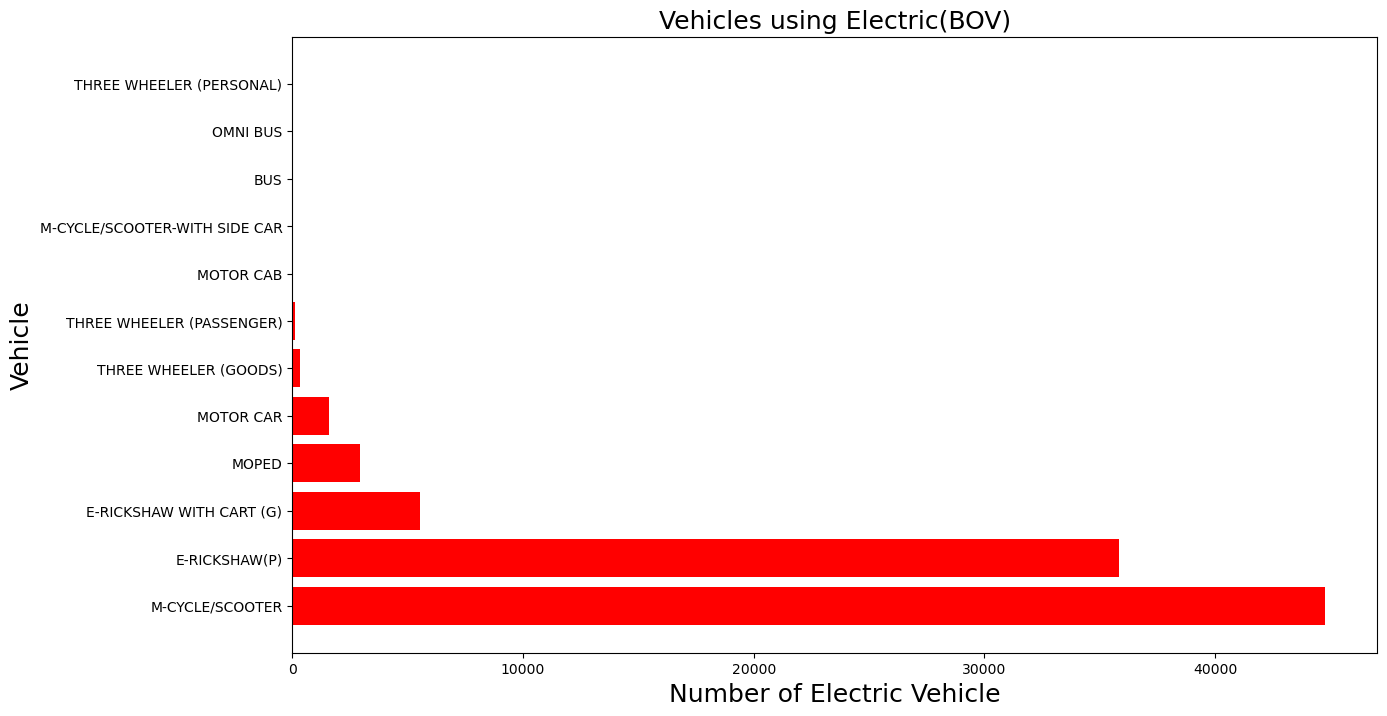

In [52]:
plot_frequency(rj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **This plot illustrates the potential opportunities within the Electric Vehicle (EV) market in Rajasthan.** 

## Haryana

In [55]:
ha = get_imp_vehicle("Geo Datasets/type_haryana.xlsx")
ha=ha.iloc[:,[0,2,3,4,5]]
ha

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,5331.0,39867.0,7.0,136.0
1,E-RICKSHAW(P),0.0,16.0,21142.0,0.0
2,E-RICKSHAW WITH CART (G),0.0,4.0,2272.0,0.0
3,M-CYCLE/SCOOTER,6.0,1732.0,13476.0,6975757.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,398.0,5.0,4642.0
5,MOPED,1.0,59.0,318.0,57721.0
6,MOTOR CAB,273.0,38422.0,400.0,4918.0
7,MOTOR CAR,321.0,998217.0,286.0,1243890.0
8,OMNI BUS,8.0,369.0,0.0,72.0
9,THREE WHEELER (GOODS),2308.0,21796.0,552.0,26.0


<Axes: ylabel='Vehicle Class'>

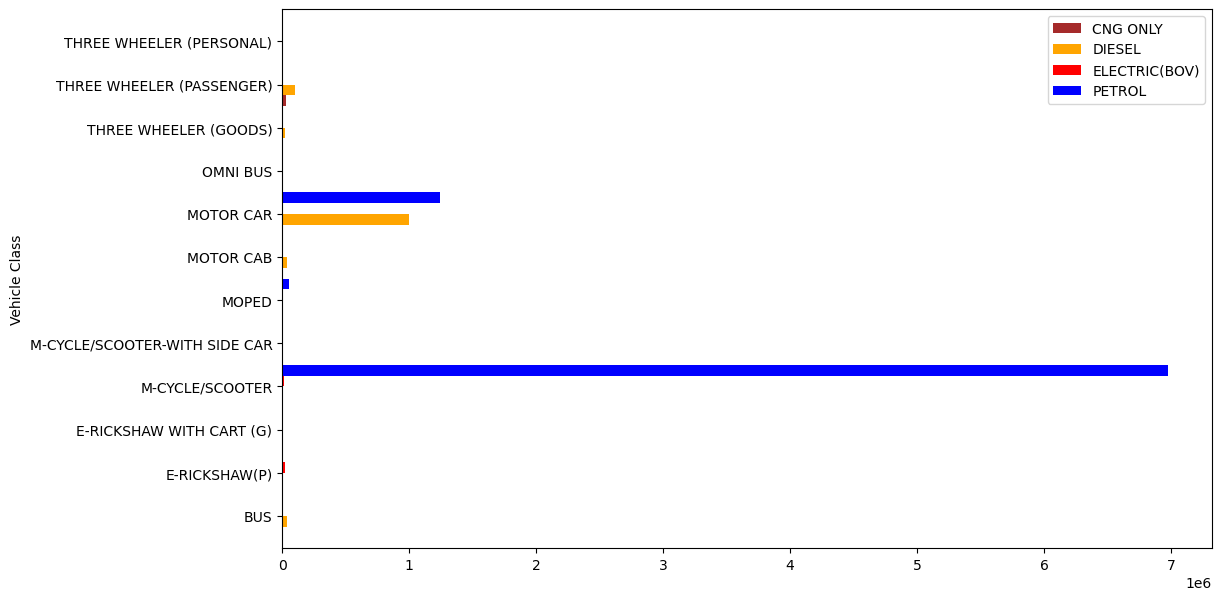

In [56]:
ha.plot.barh(x = 'Vehicle Class', color=("brown", "orange", "red", "blue"), figsize = (12,7), width = 1.0)

- **This plot explains utilisation of different fuels in the state Haryana**

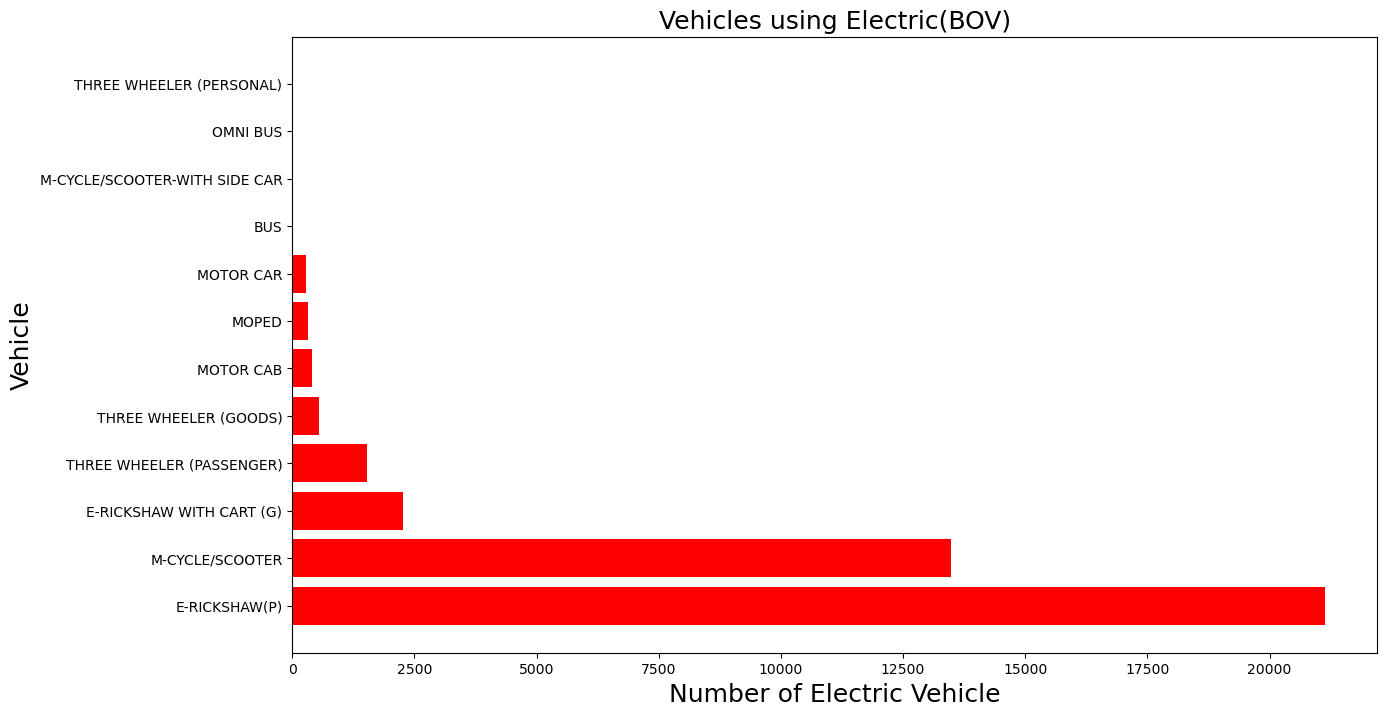

In [57]:
plot_frequency(ha,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','red')

- **This plot illustrates the potential opportunities within the Electric Vehicle (EV) market in Haryana.** 

In [59]:
mean_evs

State
Andhra Pradesh       1058.833333
Assam                5865.083333
Bihar                7627.416667
Chandigarh            281.272727
Chhatisgarh          1860.250000
Delhi               13762.500000
Gujarat              4505.750000
Haryana              3332.833333
Himachal Pradesh      103.500000
Jammu & Kashmir       324.833333
Karnataka           10263.333333
Kerala               3000.833333
Madhya Pradesh        130.000000
Maharashtra         11196.750000
Meghalaya               5.000000
Odisha               2218.333333
Puducherry            189.333333
Rajasthan            7596.916667
Sikkim                  2.571429
Tamil Nadu           6748.083333
Uttar Pradesh       30160.250000
Uttarakhand          2782.333333
West Bengal          4158.666667
Name: ELECTRIC(BOV), dtype: float64

In [67]:
mean_df=pd.DataFrame(mean_evs)
mean_df.rename(columns={"ELECTRIC(BOV)":"Average"},inplace=True)
mean_df

,Average
State,
Andhra Pradesh,1058.833333
Assam,5865.083333
Bihar,7627.416667
Chandigarh,281.272727
Chhatisgarh,1860.250000
Delhi,13762.500000
Gujarat,4505.750000
Haryana,3332.833333
Himachal Pradesh,103.500000


In [75]:
map_df=pd.read_csv('Geo Datasets/India States-UTs.csv')
mean_df.reset_index(inplace=True)
merged = map_df.set_index('State/UT').join(mean_df.set_index('State'))
merged=merged[~merged['Average'].isna()]

In [76]:
merged

,Latitude,Longitude,level_0,index,Average
State/UT,,,,,
Andhra Pradesh,15.9129,79.7400,0.0,0.0,1058.833333
Assam,31.1048,77.1734,1.0,1.0,5865.083333
Bihar,25.0961,85.3131,2.0,2.0,7627.416667
Delhi,28.7041,77.1025,5.0,5.0,13762.500000
Gujarat,22.2587,71.1924,6.0,6.0,4505.750000
Haryana,29.0588,76.0856,7.0,7.0,3332.833333
Himachal Pradesh,31.1048,77.1734,8.0,8.0,103.500000
Karnataka,15.3173,75.7139,10.0,10.0,10263.333333
Kerala,10.8505,76.2711,11.0,11.0,3000.833333


In [79]:
#!pip install folium
import folium
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for index, row in merged.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"State/UT: {index}<br> Average: {row['Average']}"
    ).add_to(m)


In [80]:
m

In [82]:
from folium.plugins import HeatMap
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
heat_data = [[row['Latitude'], row['Longitude'], row['Average']] for index, row in merged.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)
m


In [83]:
m.save("heatmap.jpeg") 